# Classy plotting
Figuring out if classes are a better way of plotting heatmaps - verdict still out

#### This notebook takes a premade heatmap array and plots it using a new Class-based method that is designed for _minimal fuss_

1. Load heatmap(s)
2. Plot using class method
3. Plot using old method

In [1]:
import os
import numpy as np
import render
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,6]

##### Loading heatmaps 

In [2]:
canon_arrays = np.load('/home/nathan/data/results/radial_analysis_output/follow/arrays/scr_apop_wt_div_N_cell_N_event_P_event_800.800.10.npz')
control_arrays = np.load('/home/nathan/data/results/radial_analysis_output/follow/arrays/wt_control_wt_div_N_cell_N_event_P_event_800.800.10.npz')

Array key: 

    arr_0 = N_cells
    arr_1 = N_events
    arr_2 = P_events
    
Array dimensionality:

    y = radial dimension
    x = temporal dimension

In [3]:
for i in canon_arrays:
    print(i)

arr_0
arr_1
arr_2


In [4]:
canon_arrays['arr_2']

array([[0.00207791, 0.00224084, 0.00141168, 0.00132865, 0.00141313,
        0.00091527, 0.00105961, 0.00105217, 0.00113566, 0.00111346],
       [0.00197637, 0.00177525, 0.00163802, 0.0015011 , 0.00134412,
        0.0012967 , 0.00134064, 0.00128581, 0.00126718, 0.00118534],
       [0.00175041, 0.0017683 , 0.0017051 , 0.00156908, 0.00148989,
        0.00137225, 0.00140396, 0.00138051, 0.00134145, 0.00129904],
       [0.00191597, 0.00168858, 0.00178383, 0.00166355, 0.00152496,
        0.00138755, 0.00140474, 0.00143284, 0.00131253, 0.00133735],
       [0.00171874, 0.00172032, 0.001738  , 0.00161022, 0.00153505,
        0.00142475, 0.00142009, 0.00142066, 0.0013129 , 0.00129414],
       [0.00184081, 0.00184503, 0.00173159, 0.00167957, 0.00156042,
        0.00148146, 0.00145129, 0.00143947, 0.00136   , 0.00127561],
       [0.00186075, 0.00181038, 0.00169634, 0.00164578, 0.00154604,
        0.00146484, 0.00145331, 0.00143062, 0.0013681 , 0.00131944],
       [0.00185229, 0.00192518, 0.0017565

In [5]:
P_events = canon_arrays['arr_2']
P_events_c = control_arrays['arr_2']

# Now with classes

Call the Heatmap class and provide the input histogram along with a few initially necessary params (ie the radius and the time range and an optional input_details dict.

In [6]:
canon_heatmap = render.Heatmap(P_events, radius = 800, t_range = 800)

Input the title of your plotP_events
Input the label for your colorbarProbability (?)
What is the focal event of the radial scan?Apop


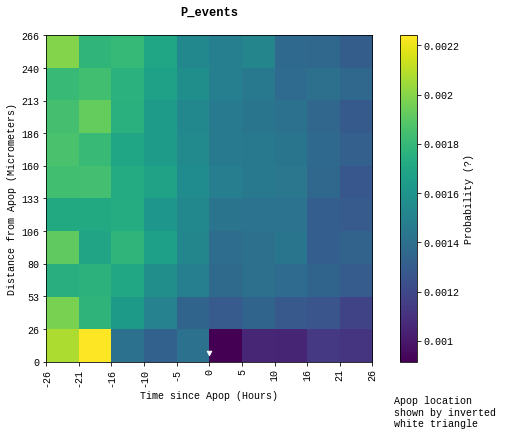

In [7]:
canon_heatmap.render_plot()

### You can also use an input dictionary called `scan_details` (similar to old plotter) in order to plot automatically and specify other plotting parameters if they are other than the default (such as including the apoptotic bin or changing the colorbar limits). 

In [8]:
canon_heatmap.scan_details = {'focal_cell':'Scribble', 'focal_event':'Apoptoses', 'input_type': 'P_events', 'N':1839, 'subject_cell': 'wild-type', 'subject_event': 'division'}

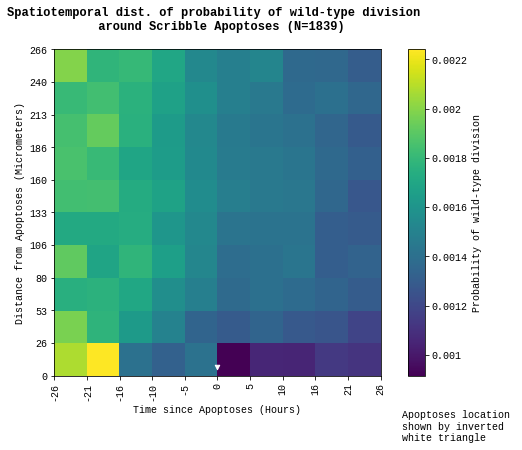

In [9]:
canon_heatmap.render_plot()

### You can specify certain parameters within the render_plot() function, such as whether to include the first spatial (apoptosis) bin, manually set the colorbar limits, or set a directory location to save out a copy of the plot.

Plot saved at  home/nathan/data/results/test/scribble_apoptoses_wild-type_division/Spatiotemporal dist. of probability of wild-type division 
 around Scribble Apoptoses (N=1839) 800.800.10.pdf


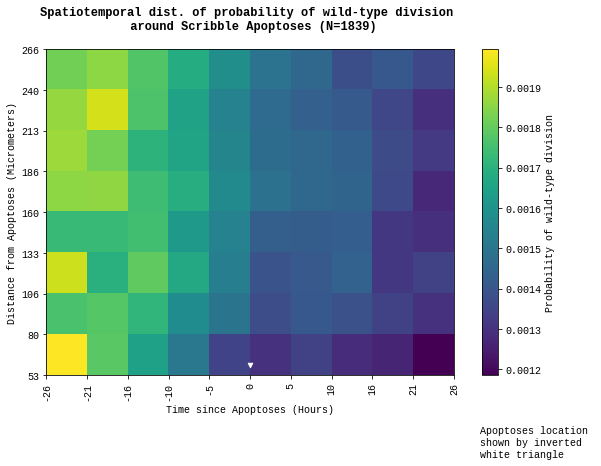

In [10]:
canon_heatmap.render_plot(include_apop_bin=False, output_path= 'home/nathan/data/results/test') #, cbar_lim=[1,0])

### By using the class method of plotting functions you can have multiple different heatmaps being plot simultaneously all with different parameters that don't get overwritten.

In [11]:
control_heatmap = render.Heatmap(P_events_c, radius = 800, t_range = 800)

In [12]:
control_heatmap.scan_details = {'focal_cell':'Wild-type', 'focal_event':'control time-points', 'input_type': 'N_cells', 'N':1839, 'subject_cell': 'Wild-type', 'subject_event': 'divisions'}

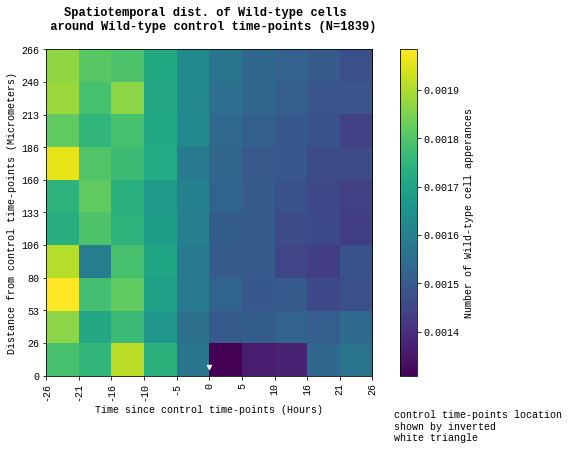

In [13]:
control_heatmap.render_plot()

# Instituting a SI measure of probability

Probability is number of events / number of observations over a ~5hr window, ie. a `t_range/num_bins` window. 

Institute it as Prob/hour? Probability of division is instituted per cell per frame in previous publications

In [14]:
num_bins = 10
t_range = 800

In [15]:
bin_t_SI = (800*(4/60))/10
bin_t_SI

5.333333333333334

In [16]:
P_events / bin_t_SI

array([[0.00038961, 0.00042016, 0.00026469, 0.00024912, 0.00026496,
        0.00017161, 0.00019868, 0.00019728, 0.00021294, 0.00020877],
       [0.00037057, 0.00033286, 0.00030713, 0.00028146, 0.00025202,
        0.00024313, 0.00025137, 0.00024109, 0.0002376 , 0.00022225],
       [0.0003282 , 0.00033156, 0.00031971, 0.0002942 , 0.00027935,
        0.0002573 , 0.00026324, 0.00025885, 0.00025152, 0.00024357],
       [0.00035925, 0.00031661, 0.00033447, 0.00031192, 0.00028593,
        0.00026017, 0.00026339, 0.00026866, 0.0002461 , 0.00025075],
       [0.00032226, 0.00032256, 0.00032588, 0.00030192, 0.00028782,
        0.00026714, 0.00026627, 0.00026637, 0.00024617, 0.00024265],
       [0.00034515, 0.00034594, 0.00032467, 0.00031492, 0.00029258,
        0.00027777, 0.00027212, 0.0002699 , 0.000255  , 0.00023918],
       [0.00034889, 0.00033945, 0.00031806, 0.00030858, 0.00028988,
        0.00027466, 0.0002725 , 0.00026824, 0.00025652, 0.0002474 ],
       [0.0003473 , 0.00036097, 0.0003293

# Realistically need to know how many wild-type cells are per frame rather than per bin

In [17]:
N_cells = canon_arrays['arr_0']
N_cells_c = control_arrays['arr_0']

In [18]:
N_cells

array([[  39944.,   63369.,   98464.,  144508.,  222201.,  407531.,
         381274.,  346902.,  308191.,  246079.],
       [ 191260.,  291227.,  431009.,  614884.,  903194., 1173751.,
        1092761.,  984594.,  855442.,  696000.],
       [ 305071.,  459764.,  683245.,  979554., 1411517., 1772267.,
        1666717., 1508136., 1312013., 1054627.],
       [ 388836.,  598136.,  886294., 1270176., 1847260., 2293253.,
        2144163., 1942998., 1690633., 1354166.],
       [ 468365.,  710913., 1062713., 1505382., 2177134., 2712057.,
        2530831., 2282736., 1982634., 1591018.],
       [ 524769.,  795109., 1174641., 1672450., 2431397., 3044286.,
        2842990., 2543298., 2211770., 1763072.],
       [ 544403.,  839603., 1244441., 1777271., 2598903., 3254283.,
        3033076., 2719802., 2348512., 1878065.],
       [ 550129.,  848752., 1275243., 1822367., 2680932., 3369656.,
        3145701., 2815028., 2420416., 1922275.],
       [ 544714.,  835057., 1264414., 1825687., 2686638., 337074

As this plot is cumulative over many different focal apoptoses, I cannot disentangle the individual contributions of each of the populations of wild-type cells in each temporal bin 

## Loading individual scans

In [2]:
path = '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/800.800/scr_apop_wt_div/800.800/'

In [43]:
file = os.path.join(path, 'GV0794_Pos4_Scr-6_N_cells_wt_rad_800_t_range_800.csv')

In [44]:
import pandas
scan = pandas.read_csv(file, names = ['cell ID', 'distance', 'frame']).replace(to_replace = r'[\(\)]', value = '', regex = True).astype(int)

In [35]:
scan

,cell ID,distance,frame
0,23,418,69
1,22,376,69
2,21,320,69
3,19,377,69
4,18,424,69
...,...,...,...
40632,664,695,868
40633,666,694,868
40634,668,711,868
40635,669,592,868


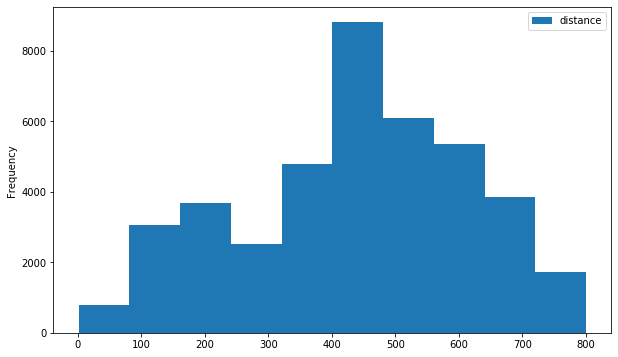

In [23]:
scan.plot.hist(bins = 10, by = [1,2])

In [36]:
x, y = scan['frame'].astype(int), scan['distance']

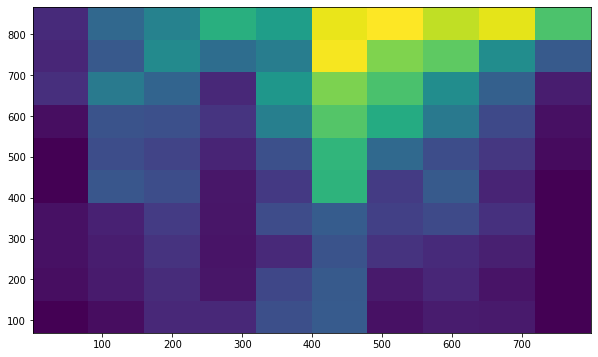

In [40]:
plt.hist2d(y, x)#, bins=(50, 50), cmap=plt.cm.jet)
plt.show()

# checking binning and plotting methods by loading as pandas arrays and plotting from that

In [5]:
from tqdm import tqdm
from functools import partial
tqdm = partial(tqdm, position = 0, leave = True)
import pandas as pd

In [ ]:
cumulative_N_cells = pd.DataFrame(columns = ['cell ID', 'distance', 'frame'])
for i, filename in enumerate(tqdm(os.listdir(path), desc = 'Loading .csv')):
    if 'N_cells' in filename:
        scan = pd.read_csv(os.path.join(path, filename), names = ['cell ID', 'distance', 'frame']).replace(to_replace = r'[\(\)]', value = '', regex = True).astype(int)
        cumulative_N_cells = pd.concat([cumulative_N_cells, scan])

Loading .csv:  40%|████      | 1479/3678 [13:00<35:30,  1.03it/s]  

In [ ]:
cumulative_N_events = pd.DataFrame(columns = ['cell ID', 'distance', 'frame'])
for i, filename in enumerate(tqdm(os.listdir(path), desc = 'Loading .csv')):
    if 'N_events' in filename:
        scan = pd.read_csv(os.path.join(path, filename), names = ['cell ID', 'distance', 'frame']).replace(to_replace = r'[\(\)]', value = '', regex = True).astype(int)
        cumulative_N_events = pd.concat([cumulative_N_events, scan])

In [ ]:
cumulative_N_cells, cumulative_N_events

In [64]:
x, y = cumulative_scan['frame'], cumulative_scan['distance']

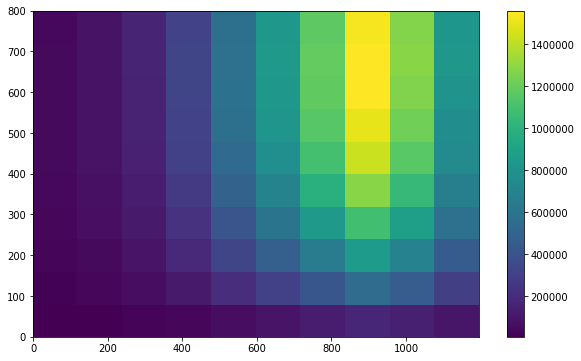

In [66]:
plt.hist2d(x, y)#, bins=(50, 50), cmap=plt.cm.jet)
plt.colorbar()
plt.show()

# this cumulative measure is unaligned around the focal apoptotic times

what am i trying to achieve here? unbinned plots? why? 